<a href="https://colab.research.google.com/github/Cyberpradeep/Handwritten_Digit_Finder/blob/main/HandwrittenDigitRecpginition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape for CNN input: (samples, height, width, channels)
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # 10 digits
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [5]:
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 47s 27ms/step - accuracy: 0.8894 - loss: 0.3512 - val_accuracy: 0.9827 - val_loss: 0.0641
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 45s 26ms/step - accuracy: 0.9837 - loss: 0.0519 - val_accuracy: 0.9865 - val_loss: 0.0478
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 26ms/step - accuracy: 0.9885 - loss: 0.0358 - val_accuracy: 0.9863 - val_loss: 0.0430
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 83s 27ms/step - accuracy: 0.9927 - loss: 0.0236 - val_accuracy: 0.9913 - val_loss: 0.0323
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 80s 26ms/step - accuracy: 0.9938 - loss: 0.0186 - val_accuracy: 0.9875 - val_loss: 0.0458


In [6]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9823 - loss: 0.0581
Test Accuracy: 0.9861999750137329


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


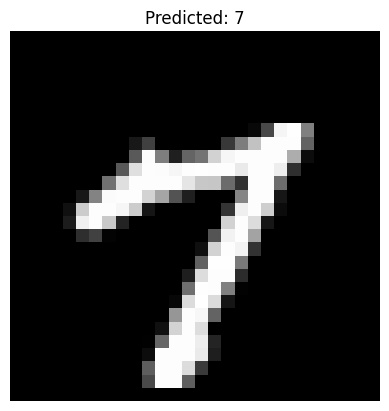

In [7]:
import random

i = random.randint(0, x_test.shape[0] - 1)
img = x_test[i]

plt.imshow(img.reshape(28, 28), cmap='gray')
plt.title("Predicted: " + str(np.argmax(model.predict(img.reshape(1, 28, 28, 1)))))
plt.axis('off')
plt.show()
